### Stock Price Prediction Using Stacked LSTM

In [1]:
# This program uses an artificial recurrent neural network called LSTM 
# to predict the stock price of a company using the old stock price

In [6]:
# Importing the Libraries

import pandas_datareader as pdr
import pandas_datareader as web
import math
import numpy as np
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [7]:
# Data Collection 

key="2c5ceaf833791f6d67c15bb442caac0b454a9966"
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [8]:
# Converting the data to .csv format

df.to_csv('His.csv')

In [9]:
df.head()

close     high  ...  divCash  splitFactor
symbol date                                        ...                      
AAPL   2016-11-25 00:00:00+00:00  111.79  111.870  ...      0.0          1.0
       2016-11-28 00:00:00+00:00  111.57  112.465  ...      0.0          1.0
       2016-11-29 00:00:00+00:00  111.46  112.030  ...      0.0          1.0
       2016-11-30 00:00:00+00:00  110.52  112.200  ...      0.0          1.0
       2016-12-01 00:00:00+00:00  109.49  110.940  ...      0.0          1.0

[5 rows x 12 columns]

In [10]:
df.tail()

close     high  ...  divCash  splitFactor
symbol date                                        ...                      
AAPL   2021-11-16 00:00:00+00:00  151.00  151.488  ...      0.0          1.0
       2021-11-17 00:00:00+00:00  153.49  155.000  ...      0.0          1.0
       2021-11-18 00:00:00+00:00  157.87  158.670  ...      0.0          1.0
       2021-11-19 00:00:00+00:00  160.55  161.020  ...      0.0          1.0
       2021-11-22 00:00:00+00:00  161.02  165.700  ...      0.0          1.0

[5 rows x 12 columns]

In [11]:
df.shape

(1257, 12)

In [13]:
# Let us consider adjOpen and adjClose values for our model

df1=df.reset_index()['adjOpen']
df1

0        26.148022
1        26.218609
2        26.065670
3        26.249197
4        25.968023
           ...    
1252    149.940000
1253    150.995000
1254    153.710000
1255    157.650000
1256    161.680000
Name: adjOpen, Length: 1257, dtype: float64

In [14]:
df2=df.reset_index()['adjClose']
df2

0        26.303315
1        26.251550
2        26.225668
3        26.004494
4        25.762143
           ...    
1252    151.000000
1253    153.490000
1254    157.870000
1255    160.550000
1256    161.020000
Name: adjClose, Length: 1257, dtype: float64

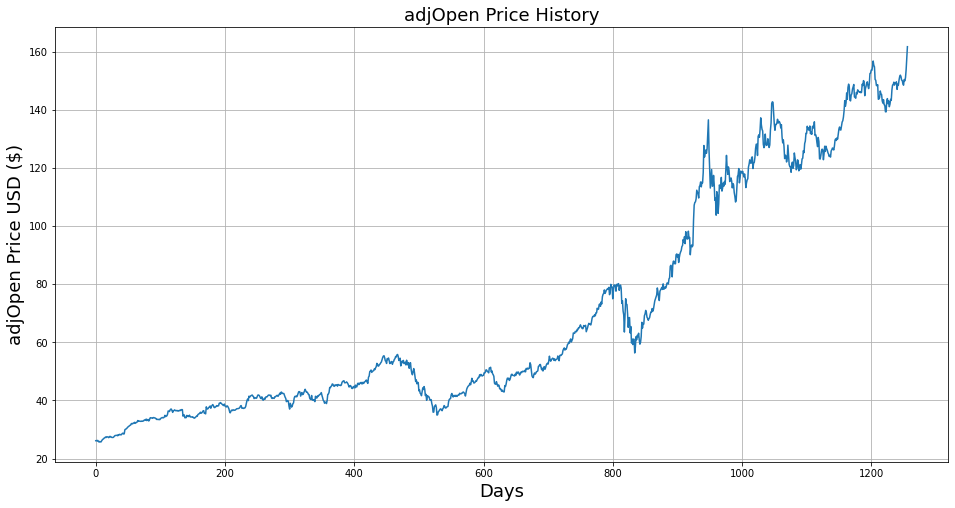

In [16]:
# Visualizing the adjOpen price history

plt.figure(figsize=(16,8))
plt.title("adjOpen Price History",fontsize=18)
plt.plot(df1)
plt.xlabel('Days', fontsize=18)
plt.ylabel('adjOpen Price USD ($)',fontsize=18)
plt.grid()
plt.show()

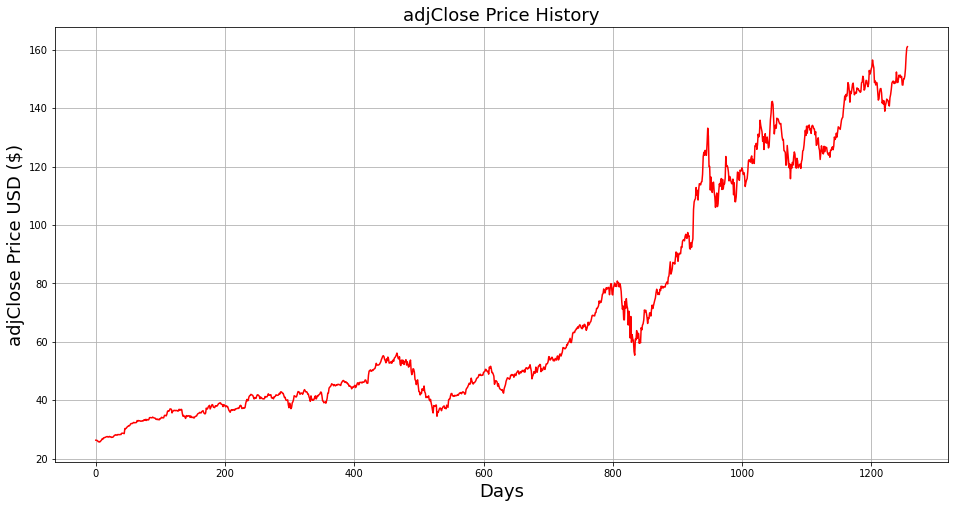

In [17]:
# Visualizing the adjClose price history

plt.figure(figsize=(16,8))
plt.title("adjClose Price History",fontsize=18)
plt.plot(df2,color="red")
plt.xlabel('Days', fontsize=18)
plt.ylabel('adjClose Price USD ($)',fontsize=18)
plt.grid()
plt.show()

In [18]:
# Scale the data

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [19]:
print(df1) #printing the scaled data

[[0.00339115]
 [0.0039102 ]
 [0.00278558]
 ...
 [0.94139411]
 [0.97036615]
 [1.        ]]


In [20]:
print(df2) #printing the scaled data

[[0.004659  ]
 [0.00427655]
 [0.00408532]
 ...
 [0.97672653]
 [0.99652745]
 [1.        ]]


In [21]:
#splitting dataset into train and test for adjOpen
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

training_size,test_size

(942, 315)

In [23]:
#train_data

In [25]:
#test_data

In [26]:
#splitting dataset into train and test for adjClose

training_size1=int(len(df2)*0.65)
test_size1=len(df2)-training_size1
train_data1,test_data1=df2[0:training_size1,:],df2[training_size1:len(df2),:1]

training_size1,test_size1

(817, 440)

In [28]:
#train_data1

In [30]:
#test_data1

In [32]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [33]:
# for adjOpen Values

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [34]:
print(X_train.shape), print(y_train.shape)

(841, 100)
(841,)


(None, None)

In [35]:
print(X_test.shape), print(ytest.shape)

(214, 100)
(214,)


(None, None)

In [36]:
# for adjClose Values

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train1, y_train1 = create_dataset(train_data1, time_step)
X_test1, ytest1 = create_dataset(test_data1, time_step)

In [37]:
print(X_train1.shape), print(y_train1.shape)

(716, 100)
(716,)


(None, None)

In [38]:
print(X_test1.shape), print(ytest1.shape)

(339, 100)
(339,)


(None, None)

In [39]:
# for adjOpen

# reshape the data [samples, time steps, features] 
# which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [42]:
# X_train

In [44]:
# X_test

In [45]:
# for adjClose

# reshape the data which is required for LSTM
X_train1 =X_train1.reshape(X_train1.shape[0],X_train1.shape[1] , 1)
X_test1 = X_test1.reshape(X_test1.shape[0],X_test1.shape[1] , 1)

In [47]:
# X_train1

In [49]:
# X_test1

In [50]:
# Create the Stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [51]:
# Build The LSTM model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [52]:
# Compile the model

model.compile(loss='mean_squared_error',optimizer='adam')

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [54]:
# train the model (adjOpen)

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 10s 296ms/step - loss: 0.0194 - val_loss: 0.1156
Epoch 2/100
14/14 [==============================] - 3s 191ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 3/100
14/14 [==============================] - 3s 202ms/step - loss: 0.0012 - val_loss: 0.0571
Epoch 4/100
14/14 [==============================] - 3s 196ms/step - loss: 6.5575e-04 - val_loss: 0.0214
Epoch 5/100
14/14 [==============================] - 3s 197ms/step - loss: 5.2737e-04 - val_loss: 0.0149
Epoch 6/100
14/14 [==============================] - 3s 204ms/step - loss: 4.9898e-04 - val_loss: 0.0102
Epoch 7/100
14/14 [==============================] - 3s 200ms/step - loss: 6.1052e-04 - val_loss: 0.0065
Epoch 8/100
14/14 [==============================] - 3s 194ms/step - loss: 4.9655e-04 - val_loss: 0.0166
Epoch 9/100
14/14 [==============================] - 3s 203ms/step - loss: 4.5610e-04 - val_loss: 0.0054
Epoch 10/100
14/14 [==============================] - 3s 192ms/ste

In [55]:
# Lets Do the prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [56]:
#Transformback to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [57]:
# Calculate RMSE performance metrics

math.sqrt(mean_squared_error(y_train,train_predict))

53.66659097934198

In [58]:
math.sqrt(mean_squared_error(ytest,test_predict))

137.25174065149665

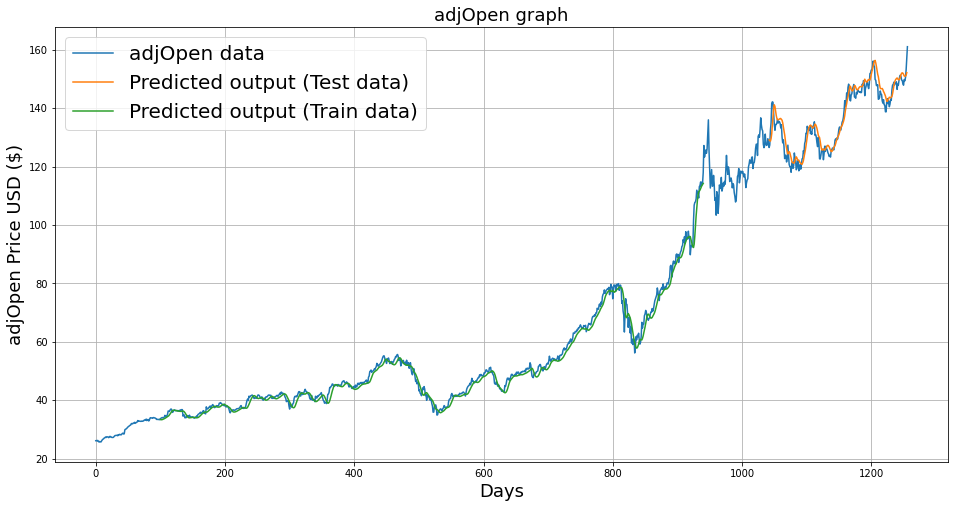

In [59]:
# Plotting the graph

# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.grid()
plt.plot(scaler.inverse_transform(df1))
plt.plot(testPredictPlot)
plt.plot(trainPredictPlot)

# Function add a legend  
plt.legend(["adjOpen data", "Predicted output (Test data)", "Predicted output (Train data)"],loc ="upper left",prop={"size":20})
plt.xlabel('Days', fontsize=18)
plt.ylabel('adjOpen Price USD ($)',fontsize=18)
plt.title("adjOpen graph",fontsize=18)

plt.show()


Text(0, 0.5, 'adjOpen Price USD ($)')

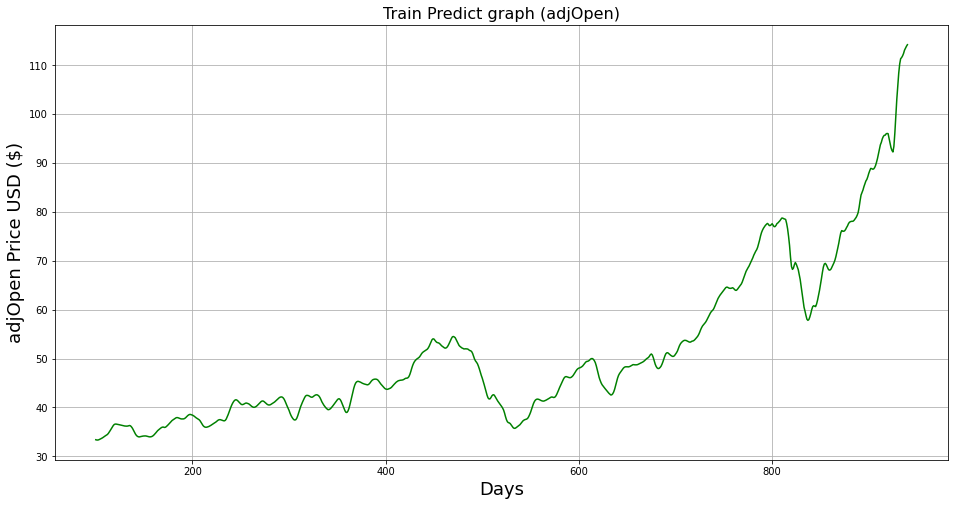

In [60]:
plt.figure(figsize=(16,8))
plt.grid()
plt.plot(trainPredictPlot,color="green")
plt.title("Train Predict graph (adjOpen)",fontsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylabel('adjOpen Price USD ($)',fontsize=18)

Text(0, 0.5, 'adjOpen Price USD ($)')

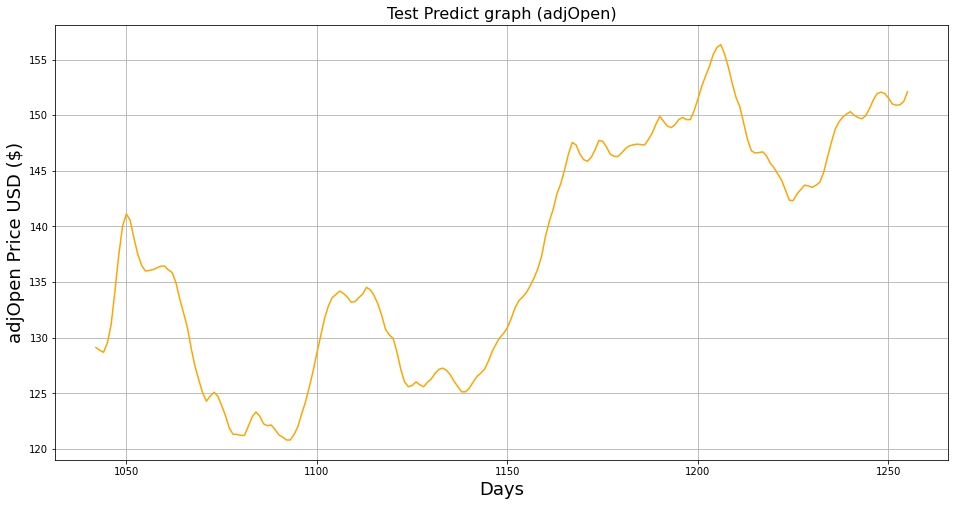

In [61]:
plt.figure(figsize=(16,8))
plt.grid()
plt.plot(testPredictPlot,color='orange')
plt.title("Test Predict graph (adjOpen)",fontsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylabel('adjOpen Price USD ($)',fontsize=18)

In [62]:
len(test_data)

315

In [63]:
x_input=test_data[215:].reshape(1,-1)
x_input.shape

(1, 100)

In [64]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input

[0.8221437398124143,
 0.838053303985179,
 0.863457285487456,
 0.8491240145388821,
 0.8577019823187286,
 0.883069305839578,
 0.8670864257024873,
 0.8969260230222371,
 0.9052840429105757,
 0.8995653977240112,
 0.865033578712382,
 0.8629074157579504,
 0.8780838202918642,
 0.8810531168309004,
 0.8928936450063529,
 0.8981723944091657,
 0.9044042513430726,
 0.8728050708890516,
 0.8718886213393853,
 0.8696524844399351,
 0.8841690452985893,
 0.8801366672819695,
 0.8908407980162476,
 0.888714635061816,
 0.8857109983169011,
 0.8846096033031909,
 0.8863718353245391,
 0.8835082082902159,
 0.8845361769693358,
 0.9049486978788723,
 0.901754652341098,
 0.9142004159887436,
 0.9110430836182646,
 0.8760187222009574,
 0.893714468745352,
 0.9001025598209005,
 0.9084731619208333,
 0.9111165099521199,
 0.9003962651577917,
 0.8940081740822434,
 0.905168976881173,
 0.9320430152015837,
 0.9332912628830043,
 0.9409276016399735,
 0.9401199119638897,
 0.9490044984030148,
 0.9637631915784959,
 0.9528226677818668,


In [65]:
 # demonstrate prediction for next 7 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.96609783]
101
1 day input [0.8380533  0.86345729 0.84912401 0.85770198 0.88306931 0.86708643
 0.89692602 0.90528404 0.8995654  0.86503358 0.86290742 0.87808382
 0.88105312 0.89289365 0.89817239 0.90440425 0.87280507 0.87188862
 0.86965248 0.88416905 0.88013667 0.8908408  0.88871464 0.885711
 0.8846096  0.88637184 0.88350821 0.88453618 0.9049487  0.90175465
 0.91420042 0.91104308 0.87601872 0.89371447 0.90010256 0.90847316
 0.91111651 0.90039627 0.89400817 0.90516898 0.93204302 0.93329126
 0.9409276  0.94011991 0.9490045  0.96376319 0.95282267 0.94922478
 0.91713747 0.91508153 0.90193822 0.9010571  0.9038473  0.86698728
 0.86794183 0.87175999 0.88791379 0.88064458 0.87924948 0.86294883
 0.85722158 0.86595931 0.85303628 0.85200831 0.83534053 0.83519368
 0.86155373 0.86867609 0.85575305 0.86280198 0.84815343 0.85457823
 0.866767   0.86438065 0.89055714 0.90296619 0.90377388 0.91023539
 0.90281933 0.90759205 0.90781232 0.91118994 0.89206238 0.90505884
 0.90267248 0.91537524 0.92411297 0

In [66]:
day_new=np.arange(1,101)
day_pred=np.arange(101,108)

In [67]:
len(df1)

1257

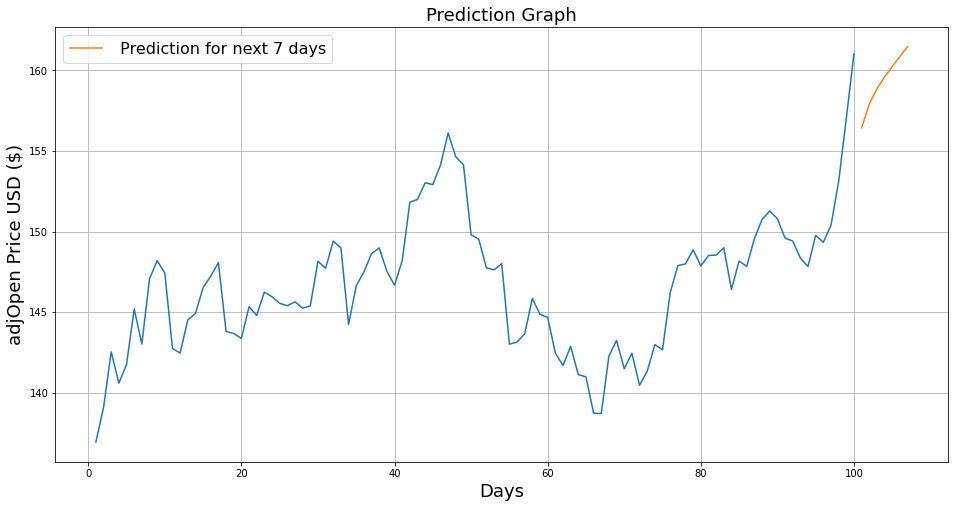

In [68]:
plt.figure(figsize=(16,8))
plt.grid()

plt.xlabel('Days', fontsize=18)
plt.ylabel('adjOpen Price USD ($)',fontsize=18)

plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output),label=' Prediction for next 7 days')

plt.title(label="Prediction Graph",fontsize=18)
plt.legend(prop={"size":16})

No handles with labels found to put in legend.


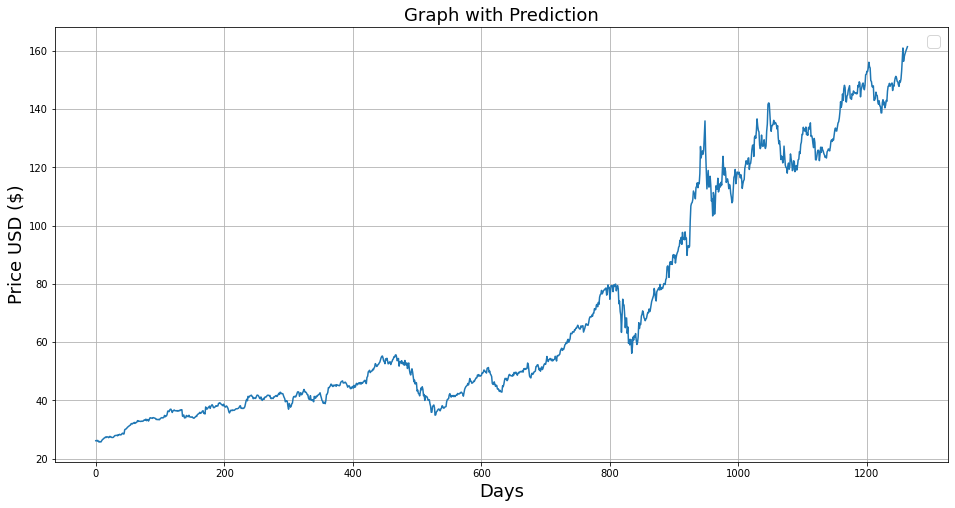

In [69]:
plt.figure(figsize=(16,8))
plt.grid()

df3=df1.tolist()
df3.extend(lst_output)
#plt.plot(df3[1259:])
plt.title(label="Prediction",fontsize=20)

df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)

plt.title(label="Graph with Prediction",fontsize=18)
plt.legend(prop={"size":16})

In [70]:
# train the model (adjClose)

model.fit(X_train1,y_train1,validation_data=(X_test1,ytest1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 219ms/step - loss: 9.5088e-05 - val_loss: 9.3507e-04
Epoch 2/100
12/12 [==============================] - 2s 207ms/step - loss: 8.9221e-05 - val_loss: 0.0011
Epoch 3/100
12/12 [==============================] - 2s 205ms/step - loss: 9.0128e-05 - val_loss: 0.0010
Epoch 4/100
12/12 [==============================] - 3s 210ms/step - loss: 9.0564e-05 - val_loss: 9.4981e-04
Epoch 5/100
12/12 [==============================] - 3s 219ms/step - loss: 8.9002e-05 - val_loss: 9.6183e-04
Epoch 6/100
12/12 [==============================] - 3s 218ms/step - loss: 8.8936e-05 - val_loss: 7.0668e-04
Epoch 7/100
12/12 [==============================] - 2s 207ms/step - loss: 8.8437e-05 - val_loss: 7.0397e-04
Epoch 8/100
12/12 [==============================] - 3s 209ms/step - loss: 8.5654e-05 - val_loss: 6.2644e-04
Epoch 9/100
12/12 [==============================] - 2s 203ms/step - loss: 8.5771e-05 - val_loss: 7.1873e-04
Epoch 10/100
12/12 [=======

In [71]:
# Lets Do the prediction and check performance metrics

train_predict1=model.predict(X_train1)
test_predict1=model.predict(X_test1)

In [72]:
#Transformback to original form

train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)

In [73]:
# Calculate RMSE performance metrics

math.sqrt(mean_squared_error(y_train1,train_predict1))

48.013936501909605

In [74]:
math.sqrt(mean_squared_error(ytest1,test_predict1))

127.68989498180181

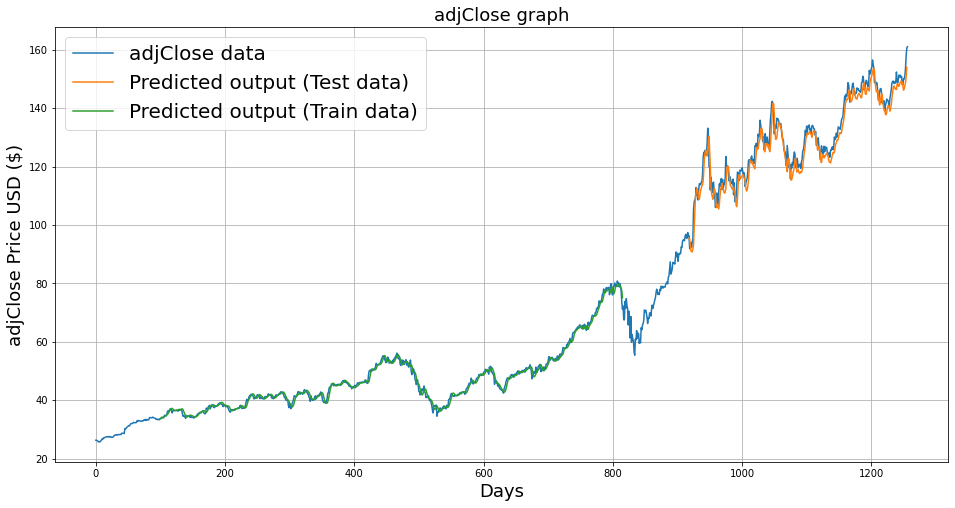

In [76]:
# Plotting the graph

# shift train predictions for plotting
look_back=100
trainPredictPlot1 = numpy.empty_like(df2)
trainPredictPlot1[:, :] = np.nan
trainPredictPlot1[look_back:len(train_predict1)+look_back, :] = train_predict1

# shift test predictions for plotting
testPredictPlot1 = numpy.empty_like(df2)
testPredictPlot1[:, :] = numpy.nan
testPredictPlot1[len(train_predict1)+(look_back*2)+1:len(df2)-1, :] = test_predict1

# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.grid()
plt.plot(scaler.inverse_transform(df2))
plt.plot(testPredictPlot1)
plt.plot(trainPredictPlot1)

# Function add a legend  
plt.legend(["adjClose data", "Predicted output (Test data)", "Predicted output (Train data)"],loc ="upper left",prop={"size":20})
plt.xlabel('Days', fontsize=18)
plt.ylabel('adjClose Price USD ($)',fontsize=18)
plt.title("adjClose graph",fontsize=18)

plt.show()


Text(0, 0.5, 'adjClose Price USD ($)')

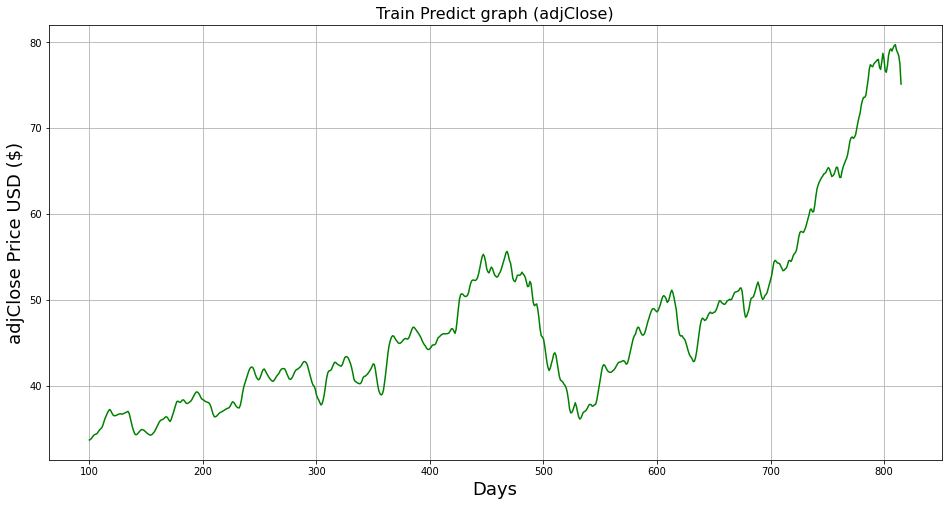

In [77]:
plt.figure(figsize=(16,8))
plt.grid()
plt.plot(trainPredictPlot1,color="green")
plt.title("Train Predict graph (adjClose)",fontsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylabel('adjClose Price USD ($)',fontsize=18)

Text(0, 0.5, 'adjClose Price USD ($)')

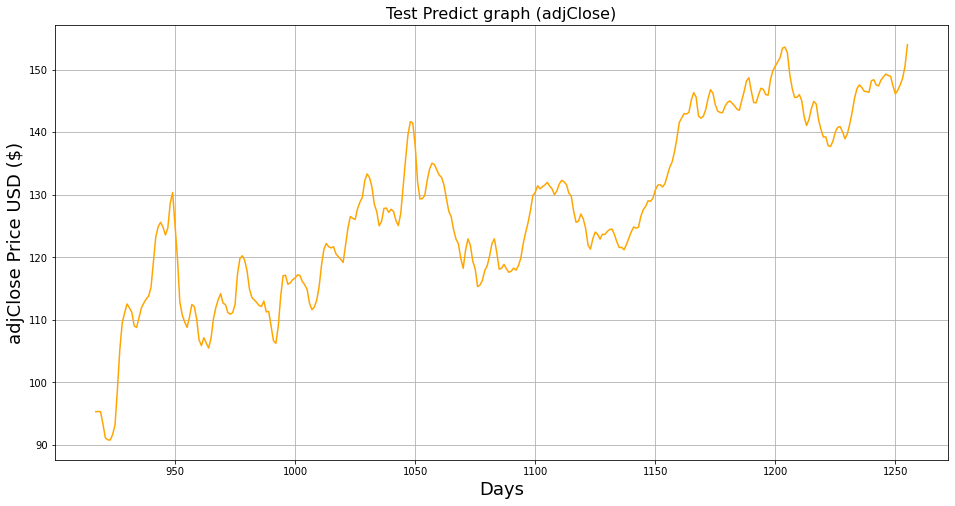

In [78]:
plt.figure(figsize=(16,8))
plt.grid()
plt.plot(testPredictPlot1,color='orange')
plt.title("Test Predict graph (adjClose)",fontsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylabel('adjClose Price USD ($)',fontsize=18)

In [79]:
len(test_data1)

440

In [80]:
x_input1=test_data1[340:].reshape(1,-1)
x_input1.shape

(1, 100)

In [81]:
temp_input1=list(x_input1)
temp_input1=temp_input1[0].tolist()

temp_input1

[0.8413465090496437,
 0.8565216701496621,
 0.875306456949265,
 0.865508901481286,
 0.8792844118007981,
 0.8747907961346166,
 0.8831887008213501,
 0.9090454073566832,
 0.9041097967075729,
 0.8887136381153509,
 0.8596893008648401,
 0.8869456581814184,
 0.8814207208874176,
 0.8917339371693065,
 0.9046991233517243,
 0.9078667540669023,
 0.8915129396771031,
 0.8783267560032204,
 0.8831887008213501,
 0.8848093490940601,
 0.8823047108547533,
 0.895859223682062,
 0.8928389246281065,
 0.8936492487644614,
 0.8884926406238864,
 0.888123756985683,
 0.8845086973360197,
 0.8864268922520169,
 0.9087812406999469,
 0.9103305519784799,
 0.925233450944013,
 0.9183722152814111,
 0.8901157286296166,
 0.8926241373661481,
 0.9036168697717504,
 0.914830932358945,
 0.9141669418112133,
 0.9048710741400161,
 0.8988213824802795,
 0.9066417156008799,
 0.9399887964544125,
 0.9304715986001457,
 0.9354884160732087,
 0.9438989630143433,
 0.9486944503050754,
 0.9663270881894708,
 0.9546703652368758,
 0.946997585571409,

In [82]:
# demonstrate prediction for next 7 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<7):
    
    if(len(temp_input1)>100):
        #print(temp_input)
        x_input=np.array(temp_input1[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input1.extend(yhat[0].tolist())
        temp_input1=temp_input1[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input1.extend(yhat[0].tolist())
        print(len(temp_input1))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.97970676]
101
1 day input [0.85652167 0.87530646 0.8655089  0.87928441 0.8747908  0.8831887
 0.90904541 0.9041098  0.88871364 0.8596893  0.88694566 0.88142072
 0.89173394 0.90469912 0.90786675 0.89151294 0.87832676 0.8831887
 0.88480935 0.88230471 0.89585922 0.89283892 0.89364925 0.88849264
 0.88812376 0.8845087  0.88642689 0.90878124 0.91033055 0.92523345
 0.91837222 0.89011573 0.89262414 0.90361687 0.91483093 0.91416694
 0.90487107 0.89882138 0.90664172 0.9399888  0.9304716  0.93548842
 0.94389896 0.94869445 0.96632709 0.95467037 0.94699759 0.90937145
 0.9136505  0.90310043 0.90981411 0.90804347 0.88790243 0.86488409
 0.86849915 0.88635312 0.89358323 0.89424723 0.88281183 0.85728508
 0.86407254 0.85426024 0.86274456 0.83684893 0.85138295 0.85794908
 0.86746627 0.86458898 0.86392499 0.85433402 0.84990741 0.87093378
 0.87890167 0.89151749 0.90782214 0.91151098 0.91313407 0.90730571
 0.90693682 0.91195364 0.90848613 0.93593108 0.91549492 0.90929768
 0.91711801 0.92796319 0.92405302 0

In [95]:
day_new=np.arange(1,101)
day_pred=np.arange(101,108)

In [96]:
len(df2)

1257

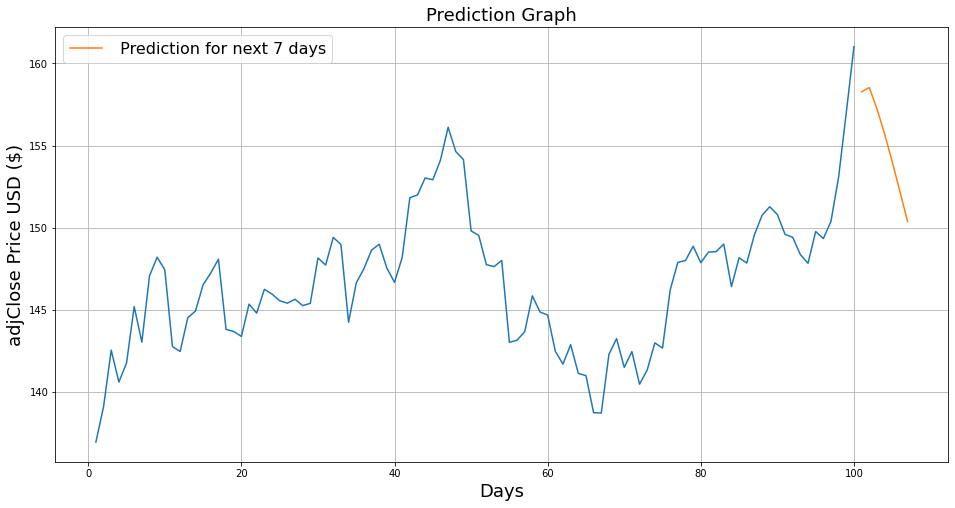

In [97]:
plt.figure(figsize=(16,8))
plt.grid()

plt.xlabel('Days', fontsize=18)
plt.ylabel('adjClose Price USD ($)',fontsize=18)

plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output),label=' Prediction for next 7 days')

plt.title(label="Prediction Graph",fontsize=18)
plt.legend(prop={"size":16})

No handles with labels found to put in legend.


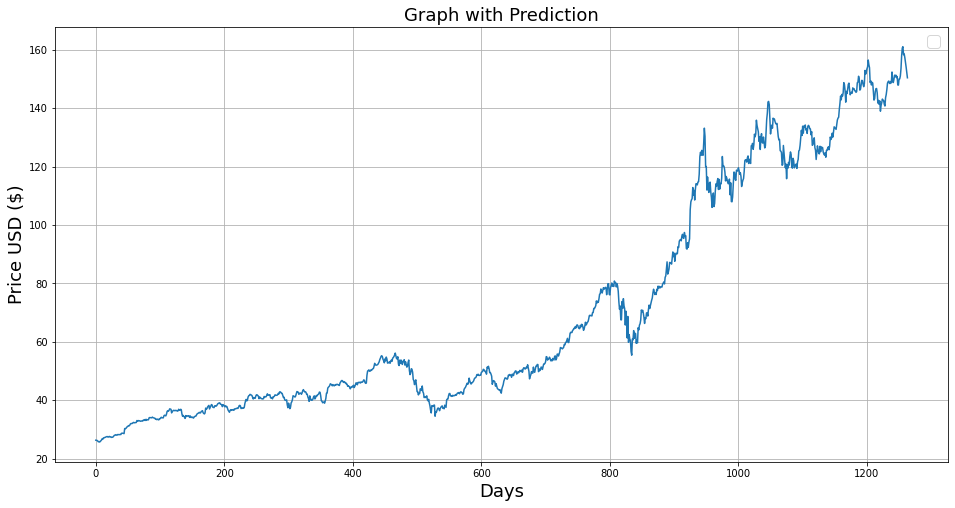

In [98]:
plt.figure(figsize=(16,8))
plt.grid()

df4=df2.tolist()
df4.extend(lst_output)
#plt.plot(df3[1259:])
plt.title(label="Prediction",fontsize=20)

df4=scaler.inverse_transform(df4).tolist()
plt.plot(df4)
plt.xlabel('Days', fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)

plt.title(label="Graph with Prediction",fontsize=18)
plt.legend(prop={"size":16})